### SatelliteBench

* [Dataset](https://physionet.org/content/multimodal-satellite-data/1.0.0/)

* [Paper](https://arxiv.org/abs/2401.11114)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/satellitedata/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image_id,text,Labels,split,embeddings
0,5360_2016-10-23.tiff,"In a city with 2 Dengue classification, 4.83% ...",2,train,"[1.069177508354187, -3.5228052139282227, 1.217..."
1,73001_2017-03-26.tiff,"In a city with 0 Dengue classification, 5.92% ...",0,train,"[1.1997452974319458, -3.5627200603485107, 1.37..."
2,50001_2018-01-28.tiff,"In a city with 1 Dengue classification, 6.82% ...",1,train,"[1.2091213464736938, -3.549386739730835, 1.165..."
3,23001_2018-07-29.tiff,"In a city with 2 Dengue classification, 7.76% ...",2,train,"[1.3183642625808716, -3.5302488803863525, 1.15..."
4,54001_2016-01-17.tiff,"In a city with 2 Dengue classification, 7.04% ...",2,train,"[1.1327471733093262, -3.515512228012085, 1.276..."
...,...,...,...,...,...
1555,5001_2018-08-05.tiff,"In a city with 0 Dengue classification, 5.16% ...",0,test,"[1.3911381959915161, -3.677438497543335, 1.234..."
1556,68001_2017-05-21.tiff,"In a city with 0 Dengue classification, 6.22% ...",0,test,"[1.4012621641159058, -3.856326103210449, 1.082..."
1557,8001_2018-04-08.tiff,"In a city with 0 Dengue classification, 7.08% ...",0,test,"[1.2318127155303955, -3.556068181991577, 1.544..."
1558,8001_2016-03-06.tiff,"In a city with 0 Dengue classification, 7.08% ...",0,test,"[1.2318127155303955, -3.556068181991577, 1.544..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,54001_2017-09-03.jpg,0.418299,0.947702,0.930388,1.698969,1.807374,-4.289507,1.434896,-0.381494,-0.494811,...,0.121961,0.978187,0.832099,0.949627,0.148457,2.130906,-0.018057,0.265088,-0.705121,-0.993023
1,5360_2016-12-25.jpg,-1.733152,0.072954,1.217731,3.282928,-0.287547,-3.268999,2.195235,-0.195035,1.090694,...,1.402666,0.294792,-0.431750,0.177886,-0.160068,-1.048362,-0.341087,-1.085934,-3.382511,0.131394
2,54001_2016-05-29.jpg,-2.767494,-2.456418,-1.362022,0.398221,0.084387,-2.661927,-0.587058,-0.366591,2.110123,...,-2.133517,-1.048133,-2.228444,-0.124623,0.926207,0.679562,1.155562,-0.294559,-3.736522,1.592287
3,23001_2017-06-18.jpg,1.059556,-2.826679,3.481805,-1.756573,1.112543,0.456796,1.465225,-1.027905,0.381944,...,0.490742,0.716432,-0.887395,1.397451,1.245598,1.794311,-0.842432,-0.949204,0.723057,-1.643899
4,8001_2017-10-22.jpg,0.867121,-0.907118,0.126425,2.029071,0.294439,-3.256753,1.642754,-0.364946,0.308146,...,-0.105881,1.974369,-1.195430,0.320480,-0.870654,0.438181,-0.759199,-0.114644,-0.726150,-2.746522


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.drop(columns='text', inplace=True)
df.Labels = df.Labels.astype(str)
df.head()

,Labels,split,text_1,text_2,text_3,text_4,text_5,text_6,text_7,text_8,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,2,train,1.069178,-3.522805,1.217289,-1.728380,1.861566,-0.094622,0.501899,1.111152,...,0.490742,0.716432,-0.887395,1.397451,1.245598,1.794311,-0.842432,-0.949204,0.723057,-1.643899
1,0,train,1.199745,-3.562720,1.373179,-1.792357,1.278816,0.044232,0.128223,1.560385,...,-0.439348,-0.597483,-1.775418,-0.523534,-0.032105,0.145365,1.217021,-0.704560,-3.825981,0.033535
2,1,train,1.209121,-3.549387,1.165757,-1.636832,1.684079,0.007860,0.454253,1.298897,...,0.004432,0.170384,-1.266712,-1.800970,0.150500,1.372797,-1.963783,-0.590766,-1.718732,-0.430727
3,2,train,1.318364,-3.530249,1.157290,-1.541048,1.580748,0.013558,0.616572,1.289030,...,0.768783,3.288118,-1.350395,0.029593,-0.064994,-1.080059,-0.423956,-1.820995,-2.254143,0.264515
4,2,train,1.132747,-3.515512,1.276161,-1.850201,1.827760,0.101031,0.527022,1.239749,...,-1.452558,-1.101930,-2.756265,-0.235486,0.902971,-0.065036,0.247114,-0.029862,-3.157093,0.870114


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'Labels'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (936, 4866)
Test Shape: (312, 4866)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623363


STAGE:2024-02-08 15:06:30 49233:49233 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.3910, macro-f1: 0.2997
Epoch 1/15 - Training Time: 0.20 seconds | Inference Time: 0.10 seconds
Epoch 2/15 - Test Accuracy: 0.9167, macro-f1: 0.8924
Epoch 2/15 - Training Time: 0.23 seconds | Inference Time: 0.10 seconds
Epoch 3/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 3/15 - Training Time: 0.27 seconds | Inference Time: 0.11 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 4/15 - Training Time: 0.26 seconds | Inference Time: 0.11 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 5/15 - Training Time: 0.22 seconds | Inference Time: 0.11 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 6/15 - Training Time: 0.29 seconds | Inference Time: 0.11 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 7/15 - Training Time: 0.25 seconds | Inference Time: 0.09 seconds
Epoch 8/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 8/15 - Training Time: 0.24 seconds | Inference Time: 0.11 seconds


STAGE:2024-02-08 15:06:36 49233:49233 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:06:36 49233:49233 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         4.67%     199.715ms        54.64%        2.338s      10.393ms    -256.95 Mb    -264.61 Mb           225  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        37.54%        1.607s        37.77%        1.616s       4.898ms     347.45 Mb     347.34 Mb           330  
                              Optimizer.step#AdamW.step         3.13%     134.112ms        25.17%        1.077s       4.788ms       4.76 Mb      -1.03

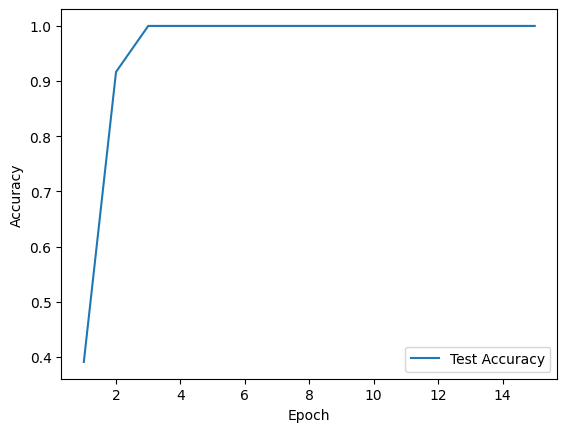

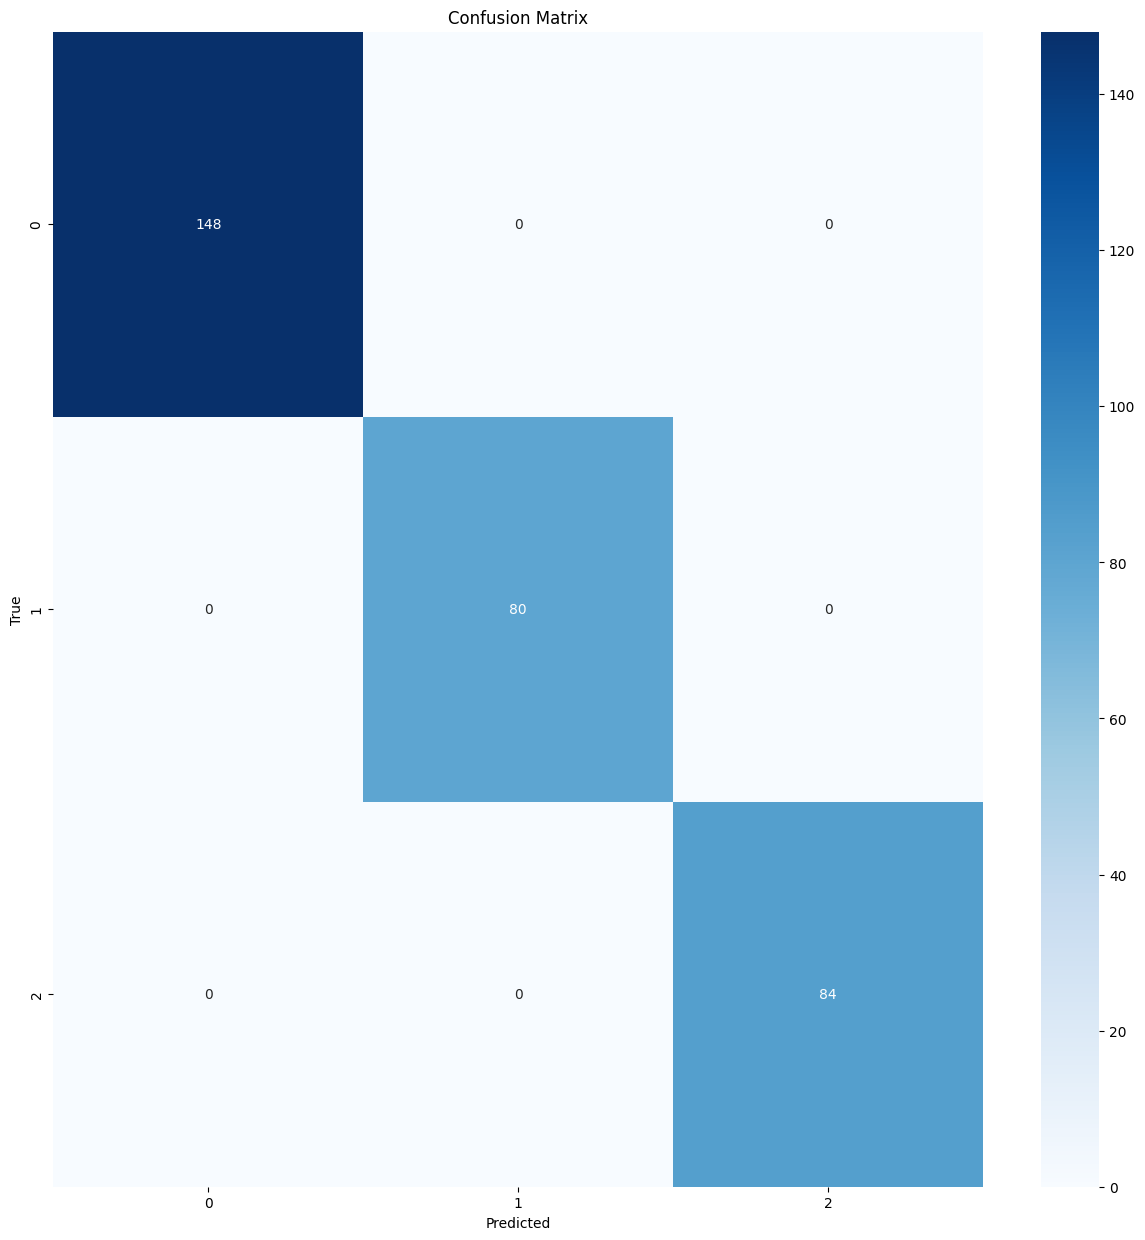

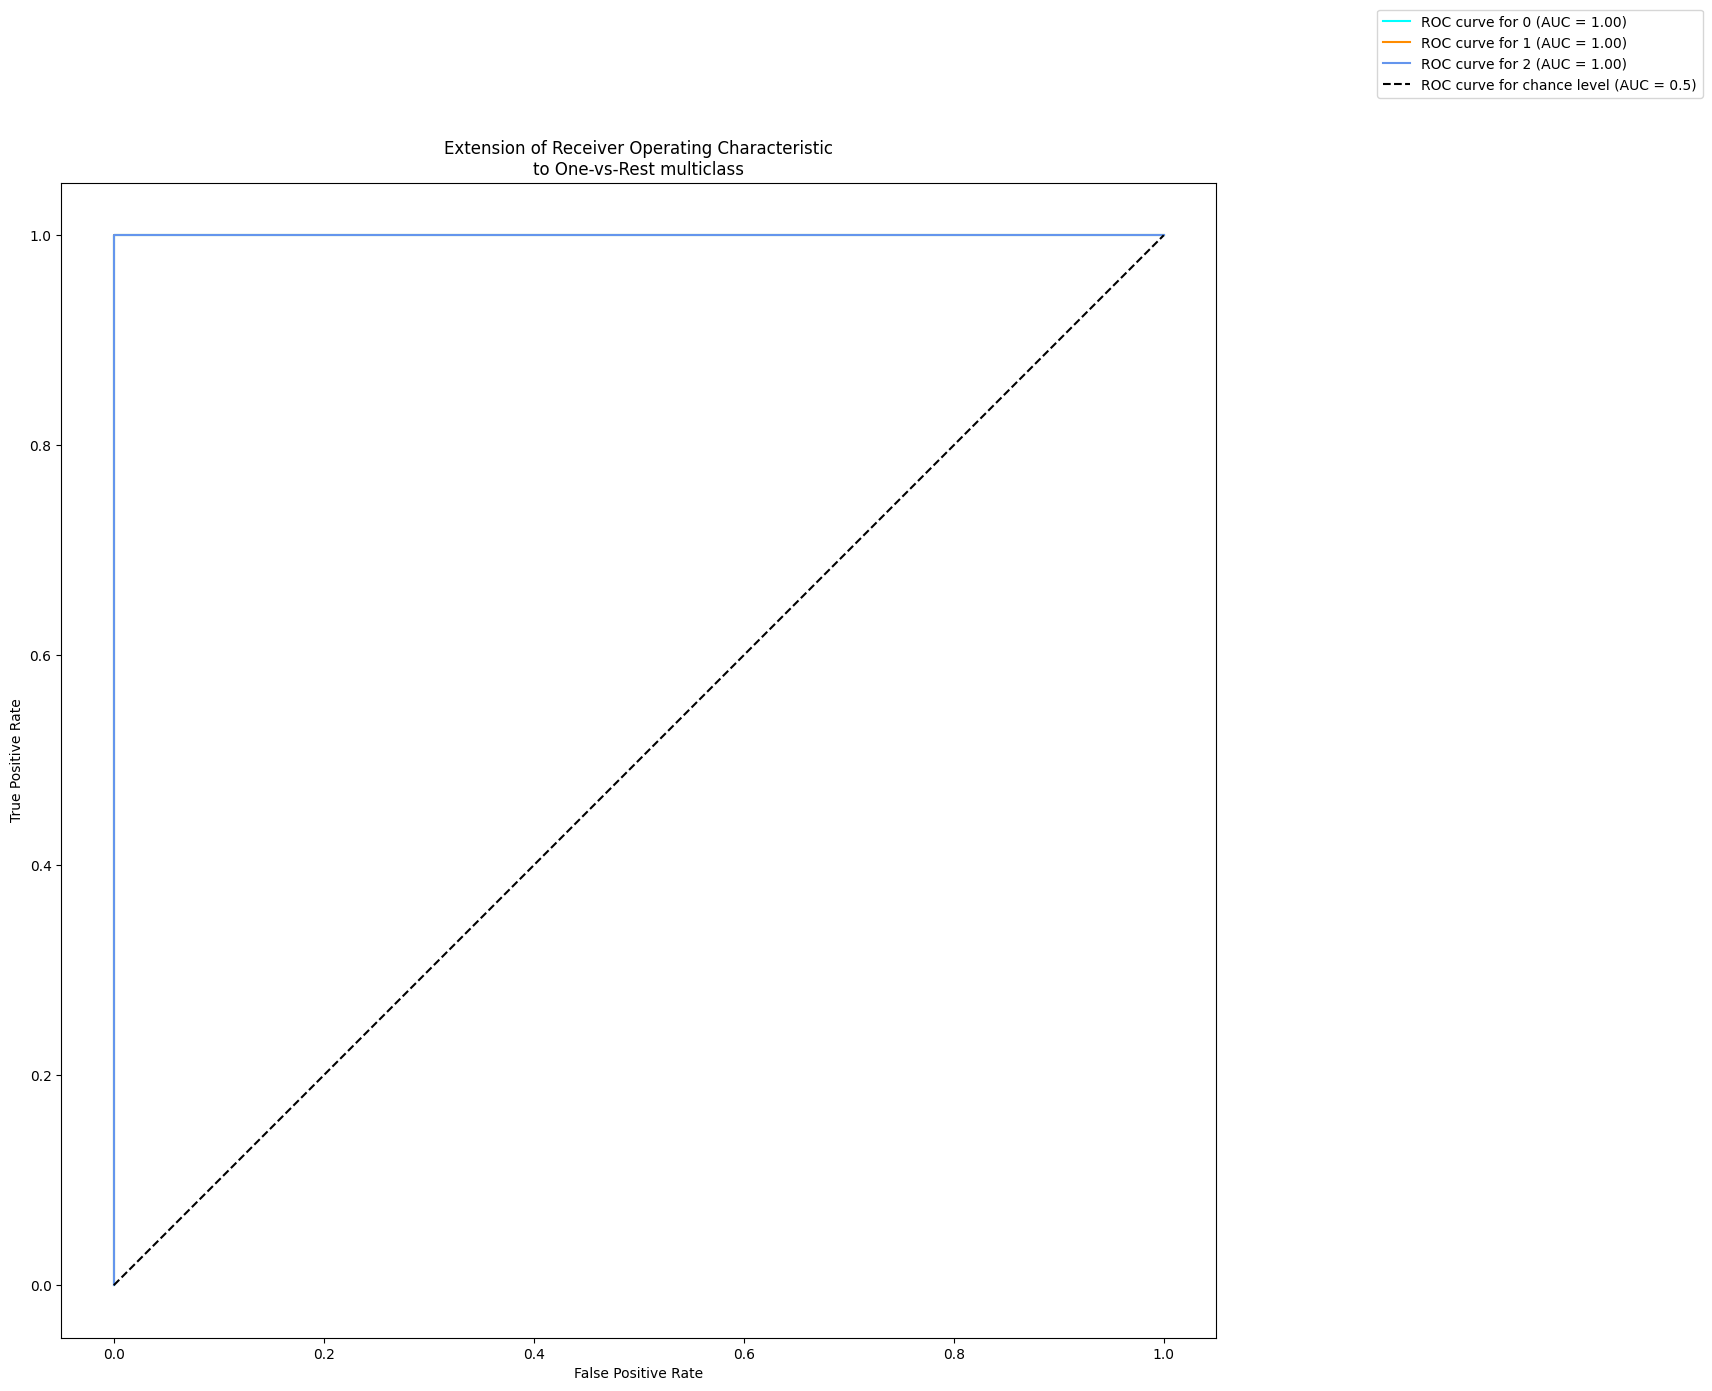

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        84

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 312067


STAGE:2024-02-08 15:06:47 49233:49233 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.5962, macro-f1: 0.4611
Epoch 1/15 - Training Time: 0.26 seconds | Inference Time: 0.11 seconds
Epoch 2/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 2/15 - Training Time: 0.25 seconds | Inference Time: 0.11 seconds
Epoch 3/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 3/15 - Training Time: 0.22 seconds | Inference Time: 0.11 seconds
Epoch 4/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 4/15 - Training Time: 0.25 seconds | Inference Time: 0.12 seconds
Epoch 5/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 5/15 - Training Time: 0.25 seconds | Inference Time: 0.13 seconds
Epoch 6/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 6/15 - Training Time: 0.25 seconds | Inference Time: 0.12 seconds
Epoch 7/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 7/15 - Training Time: 0.29 seconds | Inference Time: 0.13 seconds
Epoch 8/15 - Test Accuracy: 1.0000, macro-f1: 1.0000
Epoch 8/15 - Training Time: 0.24 seconds | Inference Time: 0.11 seconds


STAGE:2024-02-08 15:06:53 49233:49233 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 15:06:53 49233:49233 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         6.56%     270.200ms        52.02%        2.143s       7.144ms    -342.86 Mb    -346.87 Mb           300  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        47.60%        1.961s        47.83%        1.971s       5.971ms     347.45 Mb     347.34 Mb           330  
                              Optimizer.step#AdamW.step         4.02%     165.702ms        25.94%        1.069s       4.750ms       2.38 Mb    -527.62

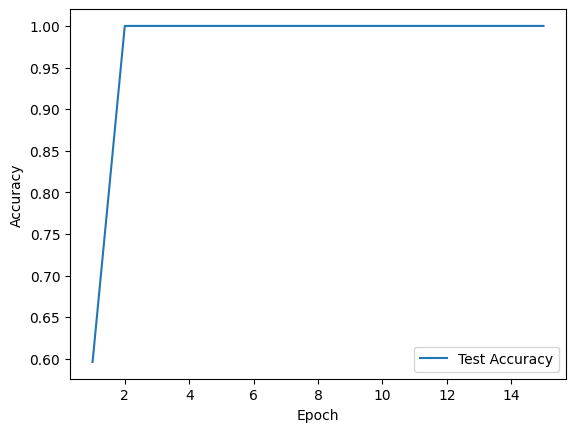

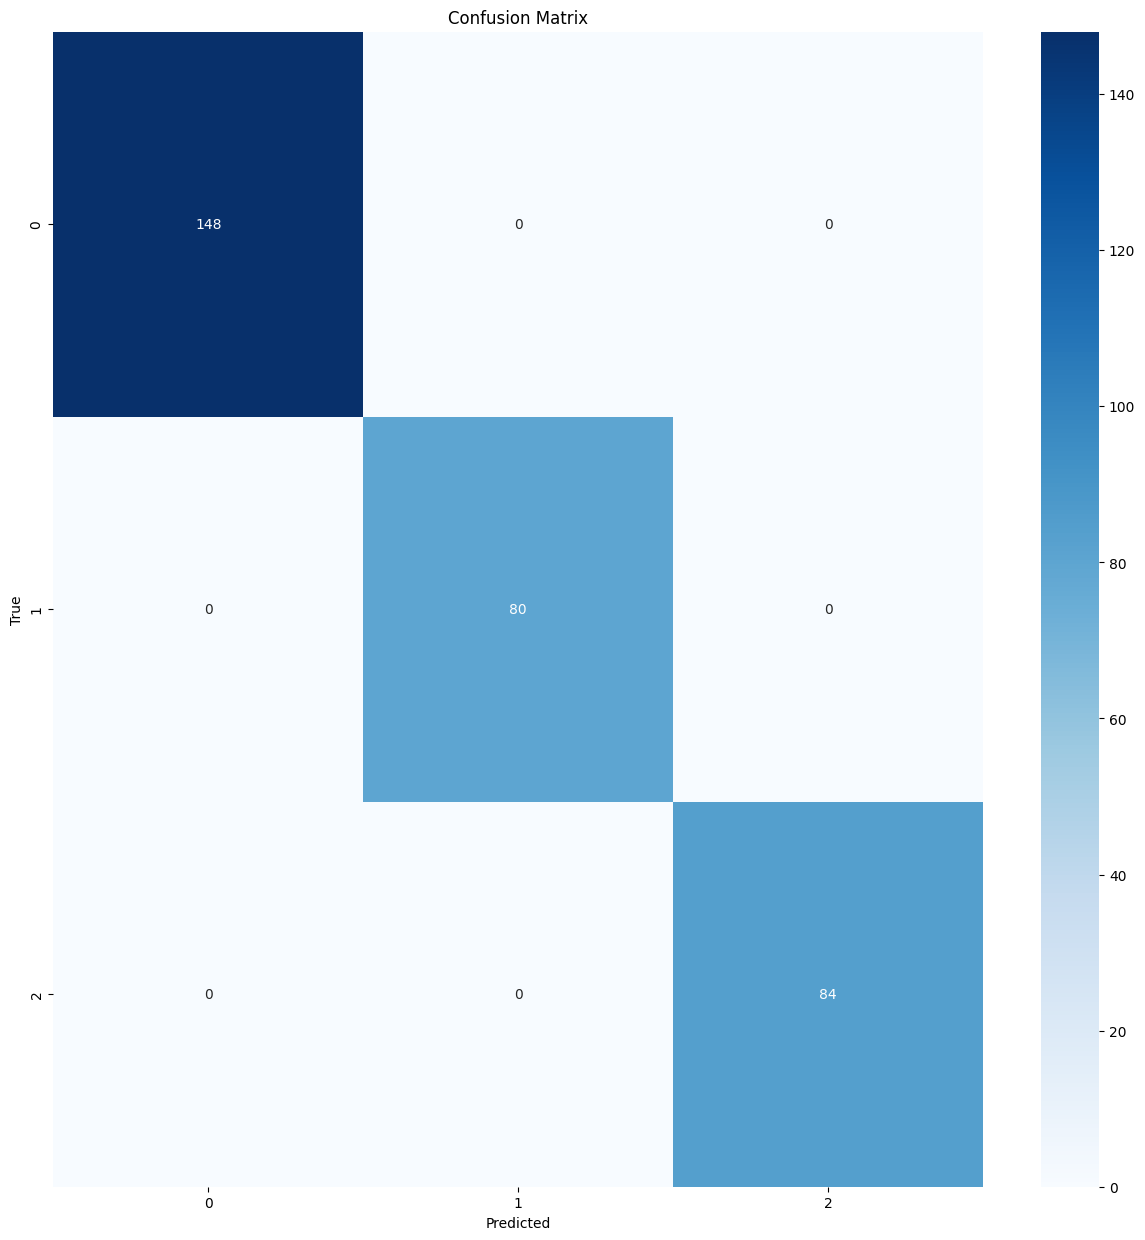

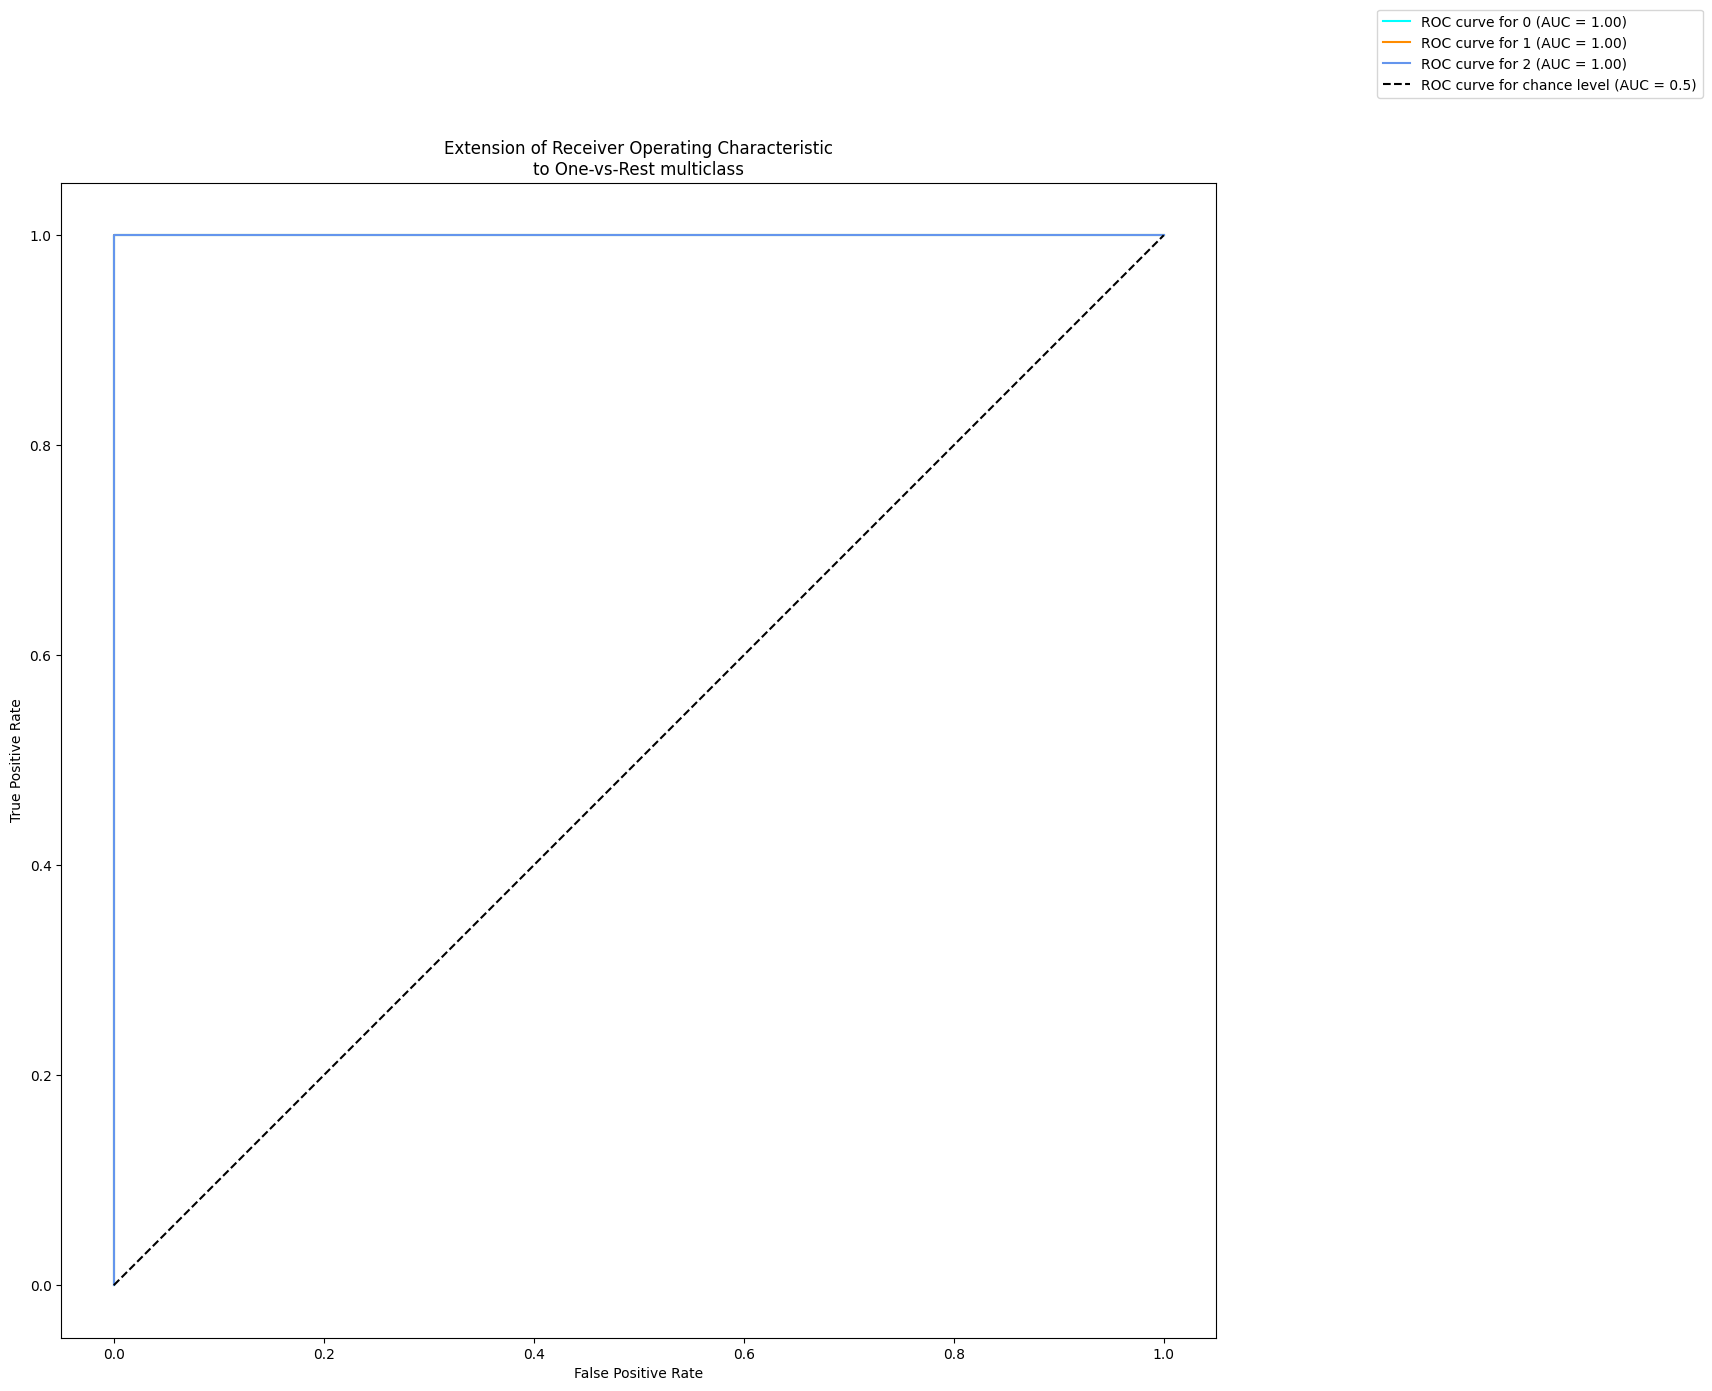

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        84

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)